In [ ]:
from google.colab import files
raw = files.upload()

Saving Pepper1-Jul-28-2022-1320.xlsx to Pepper1-Jul-28-2022-1320.xlsx


In [ ]:
log = files.upload()

Saving Pepper1-Jul-28-2022-1320.csv to Pepper1-Jul-28-2022-1320.csv


In [ ]:
# k = list(log.keys())
# print(k[0])
# k1 = list(csv.keys())
# k1 = k1[0].split('.')
# print(k1)

# dr_seg = 'Pepper2-Jul-28-2022-15-02-humanSkeletonProblem'.split('-')
# dr_new = '-'.join(dr_seg[:5]) + dr_seg[5]
# print(dr_new)

# print(list(range(1, 58)))

t1 = pd.to_datetime('12:21:00')
t2 = pd.to_datetime('12:22:00')

print(pd.Timedelta(t2 - t1).seconds)

60


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

# Data aggregation

In [ ]:
emo_path = "/content/drive/MyDrive/King's College London/Individual Project/Data/lisi-hri_emo.csv"
emo_df = pd.read_csv(emo_path)
emo_df['data_id'] = emo_df['data_id'] + '-' + emo_df['clip_id'].astype('string')
emo_df.drop(columns=['clip_id', 'label'], inplace=True)

hp_path = "/content/drive/MyDrive/King's College London/Individual Project/Data/lisi-hri_hp.csv"
hp_df = pd.read_csv(hp_path)
hp_df['data_id'] = hp_df['data_id'] + '-' + hp_df['clip_id'].astype('string')
hp_df.drop(columns=['clip_id'], inplace=True)

skl_path = "/content/drive/MyDrive/King's College London/Individual Project/Data/lisi-hri_skl_1.csv"
skl_df = pd.read_csv(skl_path)
skl_df['data_id'] = skl_df['data_id'] + '-' + skl_df['clip_id'].astype('string')
skl_df.drop(columns=['person-id', 'label', 'clip_id'], inplace=True)

# print(skl_df.shape)
# print(emo_df.shape)
# print(hp_df.shape)
trainx = hp_df.merge(emo_df, on="data_id", how="left")
trainx = trainx.merge(skl_df, on='data_id', how='left')
trainx.replace('', np.nan, inplace=True)
print(trainx.shape)
trainx.dropna(inplace=True)
print(trainx.shape)
trainx.to_csv("/content/drive/MyDrive/King's College London/Individual Project/Data/lisi-hri-visual-no-nan.csv", index=False)
trainx.head(16)

(691, 69)
(624, 69)


,data_id,label,headpose_rx_avg,headpose_ry_avg,headpose_rz_avg,headpose_rx_std,headpose_ry_std,headpose_rz_std,anger,disgust,...,3D-pos-z.14,3D-pos-x.15,3D-pos-y.15,3D-pos-z.15,3D-pos-x.16,3D-pos-y.16,3D-pos-z.16,3D-pos-x.17,3D-pos-y.17,3D-pos-z.17
0,Pepper1-Jul-28-2022-1320-0,1,0.065095,-0.012639,-0.007183,0.295013,0.316607,0.168280,0.029638,0.003104,...,0.127416,0.122496,0.043947,0.116694,0.101380,0.027492,0.151788,0.082759,0.034184,0.124647
1,Pepper1-Jul-28-2022-1320-1,2,0.252857,-0.041043,-0.127629,0.250977,0.208332,0.090755,0.143383,0.004918,...,0.047136,0.041976,0.045889,0.047066,0.041998,0.031453,0.045761,0.040091,0.025812,0.045703
2,Pepper1-Jul-28-2022-1320-2,3,0.368951,0.033149,-0.074079,0.200793,0.065408,0.065262,0.052973,0.004112,...,0.066776,0.025666,0.032925,0.069185,0.022695,0.019791,0.066572,0.023056,0.022786,0.074009
3,Pepper1-Jul-28-2022-1320-3,3,0.351787,0.032728,-0.214176,0.164588,0.046282,0.061943,0.048925,0.002068,...,0.057503,0.024355,0.053156,0.058531,0.023198,0.033944,0.060024,0.024173,0.042632,0.063096
4,Pepper1-Jul-28-2022-1320-4,3,0.430596,0.063734,-0.009670,0.127417,0.128429,0.176155,0.022417,0.010465,...,0.061983,0.034017,0.058148,0.061686,0.030025,0.037490,0.069090,0.032448,0.054665,0.069218
5,Pepper1-Jul-28-2022-1320-5,3,0.357399,0.067558,0.023080,0.099270,0.065152,0.079769,0.018663,0.000997,...,0.023484,0.046899,0.015178,0.024082,0.041732,0.007349,0.024725,0.043580,0.015689,0.026069
6,Pepper1-Jul-28-2022-1320-6,3,0.343386,0.072760,0.016778,0.082618,0.029126,0.057159,0.004097,0.000607,...,0.020372,0.024840,0.011638,0.023676,0.017816,0.009060,0.018911,0.021529,0.006425,0.027898
7,Pepper1-Jul-28-2022-1350-0,3,0.155398,0.058736,-0.027716,0.096365,0.098676,0.073337,0.063909,0.006938,...,0.034826,0.022418,0.015933,0.037769,0.014485,0.010111,0.032864,0.017941,0.010007,0.042666
8,Pepper1-Jul-28-2022-1350-1,2,0.088010,0.146206,0.050030,0.180700,0.410972,0.161038,0.032950,0.003291,...,0.039014,0.035707,0.012872,0.039686,0.015763,0.009179,0.042498,0.024878,0.011018,0.045597
9,Pepper1-Jul-28-2022-1350-2,3,0.142342,0.050887,-0.063340,0.071745,0.206194,0.139473,0.016462,0.027469,...,0.062642,0.044420,0.019888,0.061965,0.025392,0.017461,0.063582,0.032099,0.014523,0.063769


# Skeleton data processing

## Data aggregation

In [ ]:
# Take out all the body motion csv files
# Loop through all child folders:
  # if "human_motion.csv" file exists:
    # (curr_folder\human_motion.csv, new_folder\curr_folder.csv)
# ls = listdir(headpose)
# Loop through body_motion_all filenames:
  # fseg = filename.split('-')
  # filename = str(fseg[0:4].join('-')) + str(fseg[4:].join()) # Do that when copying?

# Convert hh:mm:ss.msec format into ss.msec format
# Pandas time calculation methods


# Select the correct subject

# Calculate standard deviation of body motion coordinates during certain period

# Save as .csv file


## Skeleton visualisation

In [ ]:
# df = pd.read_csv(io.BytesIO(csv['human_motion_no_header.csv']))
# dfd = df.drop(['timeline', 'scene-id', 'person-id'], axis=1)
# print(dfd.head())

   3D-pos-x  3D-pos-y  3D-pos-z  3D-pos-x.1  3D-pos-y.1  3D-pos-z.1  \
0 -0.753476 -0.241633  1.222623   -0.908620   -0.125917    1.191314   
1  0.100944 -0.100609  1.180917    0.236525    0.038231    1.198462   
2 -0.151580 -0.115503  1.408576   -0.121674    0.013816    1.477546   
3 -0.552242 -0.169859  1.581593   -0.543987   -0.037183    1.636679   
4  0.099856 -0.102864  1.176140    0.233659    0.036611    1.194894   

   3D-pos-x.2  3D-pos-y.2  3D-pos-z.2  3D-pos-x.3  ...  3D-pos-z.14  \
0   -0.967892   -0.145075    1.047666   -1.044824  ...     1.207861   
1    0.147189    0.043752    1.328350    0.148463  ...     1.205632   
2   -0.260081    0.005891    1.505929   -0.267554  ...     1.424250   
3   -0.708691   -0.049018    1.615826   -0.776723  ...     1.584100   
4    0.147005    0.042818    1.326667    0.147837  ...     1.196446   

   3D-pos-x.15  3D-pos-y.15  3D-pos-z.15  3D-pos-x.16  3D-pos-y.16  \
0    -0.751423    -0.286565     1.261815    -0.839664    -0.335236   
1     

In [ ]:
# # print(dfd.head())
# lmks = np.empty((4, dfd.shape[1] // 3, 3))
# for i in range(4):
#   for j in range(dfd.shape[1] // 3):
#     lmks[i][j] = dfd.iloc[i, j * 3: (j + 1) * 3].to_numpy()
# bone_list = [[1, 2], [2, 3], [2, 6], [3, 4], [4, 5], [3, 9], [9, 10], [10, 11],
#             [6, 7], [7, 8], [6, 12], [12, 13], [13, 14], [9, 12]]
# bone_list = np.array(bone_list) - 1

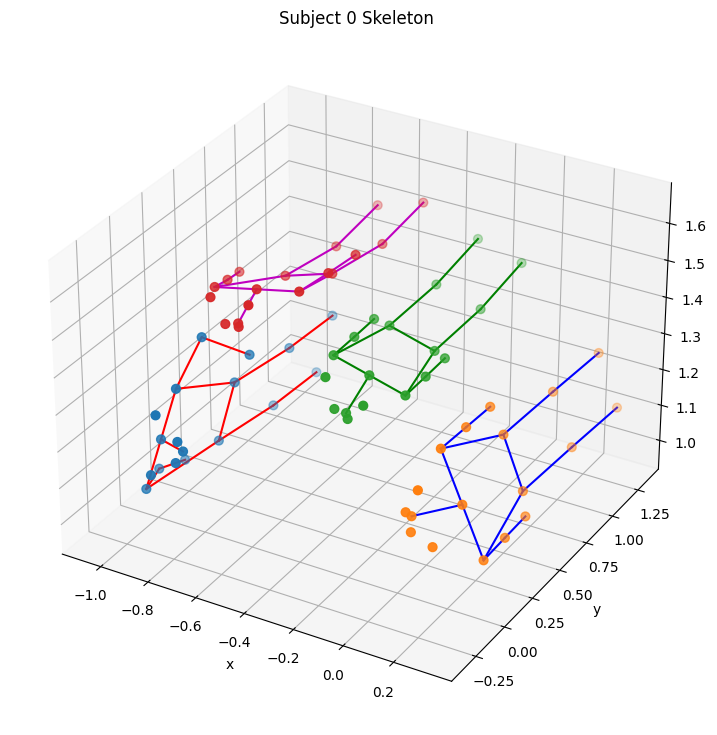

In [ ]:
# fig, ax = plt.subplots(figsize=(9, 9), subplot_kw={'projection': '3d'})
# plt.title('Subject 0 Skeleton')
# x = lmks[0, :, 0]
# y = lmks[0, :, 1]
# z = lmks[0, :, 2]
# a = lmks[1, :, 0]
# b = lmks[1, :, 1]
# c = lmks[1, :, 2]
# e = lmks[2, :, 0]
# f = lmks[2, :, 1]
# g = lmks[2, :, 2]
# l = lmks[3, :, 0]
# m = lmks[3, :, 1]
# n = lmks[3, :, 2]
# ax.scatter(x, y, z, s=40)
# for bone in bone_list:
#     ax.plot([x[bone[0]], x[bone[1]]], [y[bone[0]], y[bone[1]]], [z[bone[0]], z[bone[1]]], 'r')
# ax.scatter(a, b, c, s=40)
# for bone in bone_list:
#     ax.plot([a[bone[0]], a[bone[1]]], [b[bone[0]], b[bone[1]]], [c[bone[0]], c[bone[1]]], 'b')
# ax.scatter(e, f, g, s=40)
# for bone in bone_list:
#     ax.plot([e[bone[0]], e[bone[1]]], [f[bone[0]], f[bone[1]]], [g[bone[0]], g[bone[1]]], 'g')
# ax.scatter(l, m, n, s=40)
# for bone in bone_list:
#     ax.plot([l[bone[0]], l[bone[1]]], [m[bone[0]], m[bone[1]]], [n[bone[0]], n[bone[1]]], 'm')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# plt.show()

In [ ]:
# sbj_df = pd.DataFrame({
#     "data_sq": ['Pepper1-Jul-28-2022-1320'],
#     "sbj_id": [0],
# })
# print(sbj_df)

                    data_sq  sbj_id
0  Pepper1-Jul-28-2022-1320       0


# Head pose data clearning

Creating dataframes

In [ ]:
filename = 'Pepper1-Jul-28-2022-1320_hp.csv'
data_id = filename.split('.')
data_id = data_id[0][:-3]
# print(data_id)
headpose_df = pd.read_csv(filename)
# print(headpose_df.columns.tolist())
headpose_df = headpose_df[[' timestamp', ' gaze_0_x', ' pose_Rx', ' pose_Ry', ' pose_Rz']]
headpose_df = headpose_df.rename(columns={' timestamp': 'timestamp', ' gaze_0_x': 'gaze_0_x',
                                          ' pose_Rx': 'pose_Rx', ' pose_Ry': 'pose_Ry',
                                          ' pose_Rz': 'pose_Rz'})
label_df = pd.read_csv('Pepper1-Jul-28-2022-1320_labels.csv',
                       header=None, names=['tier', 'emp', 'start_time', 'end_time', 'label'])
label_df = label_df.drop(['emp'], axis=1)
label_df = label_df.loc[label_df['tier'] == 'Video'].reset_index(drop=True)
dataset = pd.DataFrame(columns=['data_id', 'clip_id', 'label', 'gaze_0_x_avg',
                               'headpose_rx_avg', 'headpose_ry_avg',
                               'headpose_rz_avg', 'headpose_rx_std',
                               'headpose_ry_std', 'headpose_rz_std'])
# headpose_df
label_df
# dataset

,tier,start_time,end_time,label
0,Video,0.0,17.000,1
1,Video,17.0,24.000,2
2,Video,24.1,63.400,3
3,Video,63.5,77.200,3
4,Video,77.2,88.100,3
5,Video,88.2,102.100,3
6,Video,102.6,119.808,3


## Save in dataset

Single line

In [ ]:
clip = label_df.iloc[0]
# print(type(int(clip['label'])))
# clip
avg = headpose_df.loc[lambda headpose_df: (headpose_df['timestamp'] >= clip['start_time']) &
   (headpose_df['timestamp'] <= clip['end_time'])].mean()
print(avg[1:].tolist())
std = headpose_df.loc[lambda headpose_df: (headpose_df['timestamp'] >= clip['start_time']) &
   (headpose_df['timestamp'] <= clip['end_time'])].std()
print(std[2:].tolist())
lb = int(clip['label'])
new_clip_data = [data_id] + [0] + [lb] + avg[1:].tolist() + std[2:].tolist()
print(new_clip_data)
dataset.loc[len(dataset)] = new_clip_data
dataset

[0.10941363905325442, 0.06509467455621303, -0.012639053254437876, -0.007183431952662724]
[0.2950134428455186, 0.3166067579506962, 0.16828036614123404]
['Pepper1-Jul-28-2022-1320', 0, 1, 0.10941363905325442, 0.06509467455621303, -0.012639053254437876, -0.007183431952662724, 0.2950134428455186, 0.3166067579506962, 0.16828036614123404]


,data_id,clip_id,label,gaze_0_x_avg,headpose_rx_avg,headpose_rx_std,headpose_ry_avg,headpose_ry_std,headpose_rz_avg,headpose_rz_std
0,Pepper1-Jul-28-2022-1320,0,1,0.109414,0.065095,-0.012639,-0.007183,0.295013,0.316607,0.16828


Batch processing

In [ ]:
i = 0
for _, clip in label_df.iterrows():
  avg = headpose_df.loc[lambda headpose_df: (headpose_df['timestamp'] >= clip['start_time']) &
   (headpose_df['timestamp'] <= clip['end_time'])].mean()
  std = headpose_df.loc[lambda headpose_df: (headpose_df['timestamp'] >= clip['start_time']) &
   (headpose_df['timestamp'] <= clip['end_time'])].std()
  lb = int(clip['label'])
  new_clip_data = [data_id] + [i] + [lb] + avg[1:].tolist() + std[2:].tolist()
  dataset.loc[len(dataset)] = new_clip_data
  i += 1
dataset

,data_id,clip_id,label,gaze_0_x_avg,headpose_rx_avg,headpose_ry_avg,headpose_rz_avg,headpose_rx_std,headpose_ry_std,headpose_rz_std
0,Pepper1-Jul-28-2022-1320,0,1,0.109414,0.065095,-0.012639,-0.007183,0.295013,0.316607,0.168280
1,Pepper1-Jul-28-2022-1320,1,2,0.070613,0.252857,-0.041043,-0.127629,0.250977,0.208332,0.090755
2,Pepper1-Jul-28-2022-1320,2,3,0.077145,0.368951,0.033149,-0.074079,0.200793,0.065408,0.065262
3,Pepper1-Jul-28-2022-1320,3,3,0.113259,0.351787,0.032728,-0.214176,0.164588,0.046282,0.061943
4,Pepper1-Jul-28-2022-1320,4,3,0.062853,0.430596,0.063734,-0.009670,0.127417,0.128429,0.176155
5,Pepper1-Jul-28-2022-1320,5,3,0.035529,0.357399,0.067558,0.023080,0.099270,0.065152,0.079769
6,Pepper1-Jul-28-2022-1320,6,3,0.019233,0.343386,0.072760,0.016778,0.082618,0.029126,0.057159


# Emotion feature processing

In [ ]:
label_df = pd.read_csv('Pepper1-Jul-28-2022-1320.csv',
                       header=None, names=['tier', 'emp', 'start_time', 'end_time', 'label'])
label_df = label_df.drop(['emp'], axis=1)
label_df = label_df.loc[label_df['tier'] == 'Video'].reset_index(drop=True)
label_df
dataset = pd.DataFrame(columns=['data_id', 'clip_id', 'label', 'anger',
                                'disgust', 'fear', 'happiness', 'sadness',
                                'surprise', 'neutral'])
# Create Emotion feature DataFrame
r = list(raw.keys())[0]
emo_df = pd.read_excel(r, index_col=None, na_values=['NA'], usecols="B:I", header=1)
data_id = r.split('.')[0]

# Convert frame numbers into seconds
emo_df['timestamp'] = emo_df['frame'] / 9
emo_df = emo_df[['frame', 'timestamp', 'anger', 'disgust', 'fear', 'happiness',
                 'sadness', 'surprise', 'neutral']]
emo_df.iloc[56:]

,frame,timestamp,anger,disgust,fear,happiness,sadness,surprise,neutral
56,920,102.222222,0.000039,0.000072,0.000045,0.997188,0.001029,0.001540,0.000087
57,940,104.444444,0.000041,0.000022,0.000013,0.998495,0.000180,0.001211,0.000037
58,960,106.666667,0.002290,0.000259,0.000934,0.943125,0.001120,0.047716,0.004556
59,980,108.888889,0.001513,0.000488,0.000992,0.921022,0.003007,0.059756,0.013222
60,1000,111.111111,0.001437,0.000536,0.000799,0.967657,0.002630,0.024061,0.002880
61,1020,113.333333,0.000455,0.000613,0.001391,0.975814,0.002726,0.018294,0.000708
62,1040,115.555556,0.010573,0.000535,0.001888,0.154131,0.007212,0.802175,0.023486
63,1060,117.777778,0.012373,0.001793,0.000355,0.058163,0.084832,0.002810,0.839673
64,1080,120.000000,0.023602,0.000557,0.000686,0.007549,0.290402,0.006671,0.670533
65,1100,122.222222,0.011569,0.002636,0.000606,0.407421,0.055857,0.001279,0.520632


In [ ]:
# Calculating descriptive statistics
cnt = 0
for _, clip in label_df.iterrows():
  avg = emo_df.loc[lambda emo_df: (emo_df['timestamp'] >= clip['start_time']) &
    (emo_df['timestamp'] <= clip['end_time'])].mean(axis=0)
  lab = int(clip['label'])
  new_clip_data = [data_id] + [cnt] + [lab] + avg[2:].tolist()
  dataset.loc[len(dataset)] = new_clip_data
  cnt += 1
dataset

,data_id,clip_id,label,anger,disgust,fear,happiness,sadness,surprise,neutral
0,Pepper1-Jul-28-2022-1320,0,1,0.029638,0.003104,0.046306,0.626653,0.060477,0.083366,0.150457
1,Pepper1-Jul-28-2022-1320,1,2,0.143383,0.004918,0.002321,0.014980,0.468086,0.303195,0.063118
2,Pepper1-Jul-28-2022-1320,2,3,0.052973,0.004112,0.004152,0.262292,0.157749,0.105098,0.413624
3,Pepper1-Jul-28-2022-1320,3,3,0.048925,0.002068,0.002227,0.137534,0.099082,0.253116,0.457048
4,Pepper1-Jul-28-2022-1320,4,3,0.022417,0.010465,0.002562,0.773881,0.094918,0.063331,0.032426
5,Pepper1-Jul-28-2022-1320,5,3,0.018663,0.000997,0.003674,0.790619,0.049895,0.100912,0.035239
6,Pepper1-Jul-28-2022-1320,6,3,0.004097,0.000607,0.000910,0.716915,0.014529,0.136575,0.126366
